### Docker and Docker Compose Install Pre and post steps

in windows, Docker Compose has been installed together with Docker Desktop. But in linux/ ubuntu, you need to install docker compose individually

1. https://www.simplilearn.com/tutorials/docker-tutorial/install-docker-on-windows
2. https://www.youtube.com/watch?v=XgRGI0Pw2mM


1. While choosing for windows 10 or 11 with 64 bit, it must be having higher level of translation
2. 4GB RAM or Higher version but not less
3. BIOS settings should have hardware virtualization support enabled.
4. Hyper V feature, WSL 2 feature and Container feature should be enabled in windows.  
5. Windows supported by Microsoft need to be updated, if computers have older versions of windows.  

#### Hyper V feature
https://learn.microsoft.com/en-us/virtualization/hyper-v-on-windows/quick-start/enable-hyper-v

1. Right click on the Windows button and select ‘Apps and Features’.

2. Select Programs and Features on the right under related settings.

3. Select Turn Windows Features on or off.

4. Select Hyper-V and click OK.

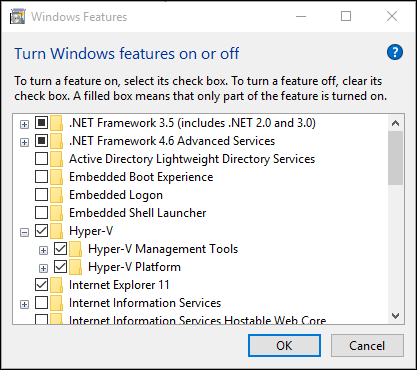

#### WSL 2 feature

https://pureinfotech.com/install-windows-subsystem-linux-2-windows-10/#install_wsl_command_2004_windows10

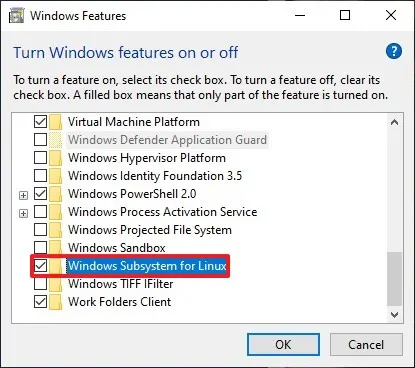

1. Enable Windows Subsystem for Linux 2
To start using WSL2 or covert WSL distros to WSL2, use these steps:

Download this WSL 2 kernel update (required).
https://wslstorestorage.blob.core.windows.net/wslblob/wsl_update_x64.msi

Double-click the wsl_update_x64.msi file and apply the update.

Open Start.

Search for PowerShell, right-click the top result, and select the Run as administrator option.

Type the following command to set Windows Subsystem for Linux 2 your default architecture for new distros that you install, and press Enter:

wsl --set-default-version 2

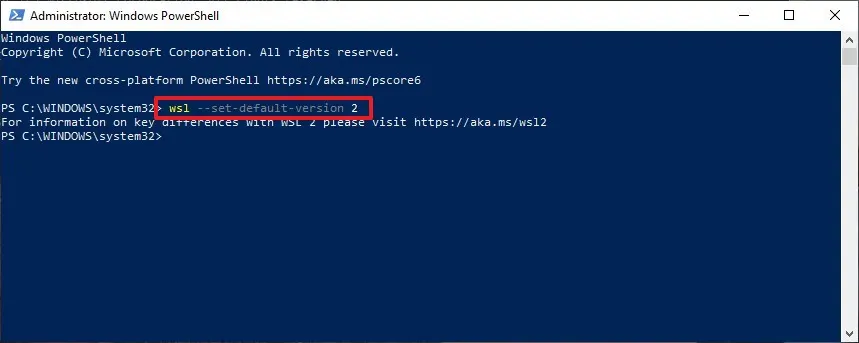

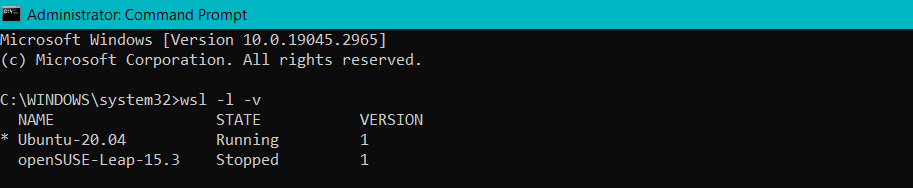

### WSL 1 to WSL 2

`PS C:\WINDOWS\system32>  wsl --set-version Ubuntu-20.04 2`

`PS C:\WINDOWS\system32> wsl -l -v`

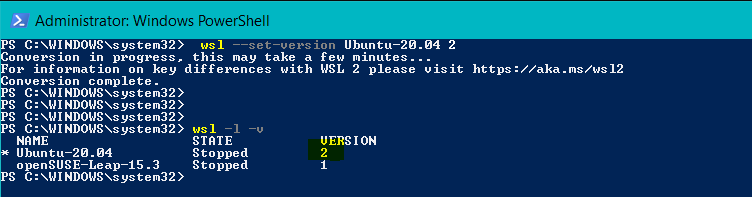

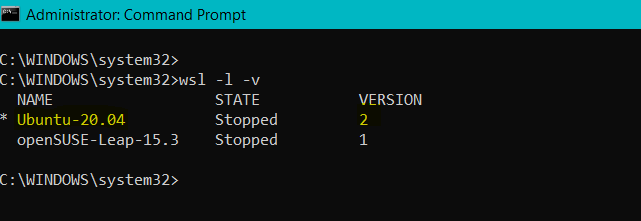

To run wsl

`wsl -d Ubuntu-20.04`

Then use command promote

### Container feature


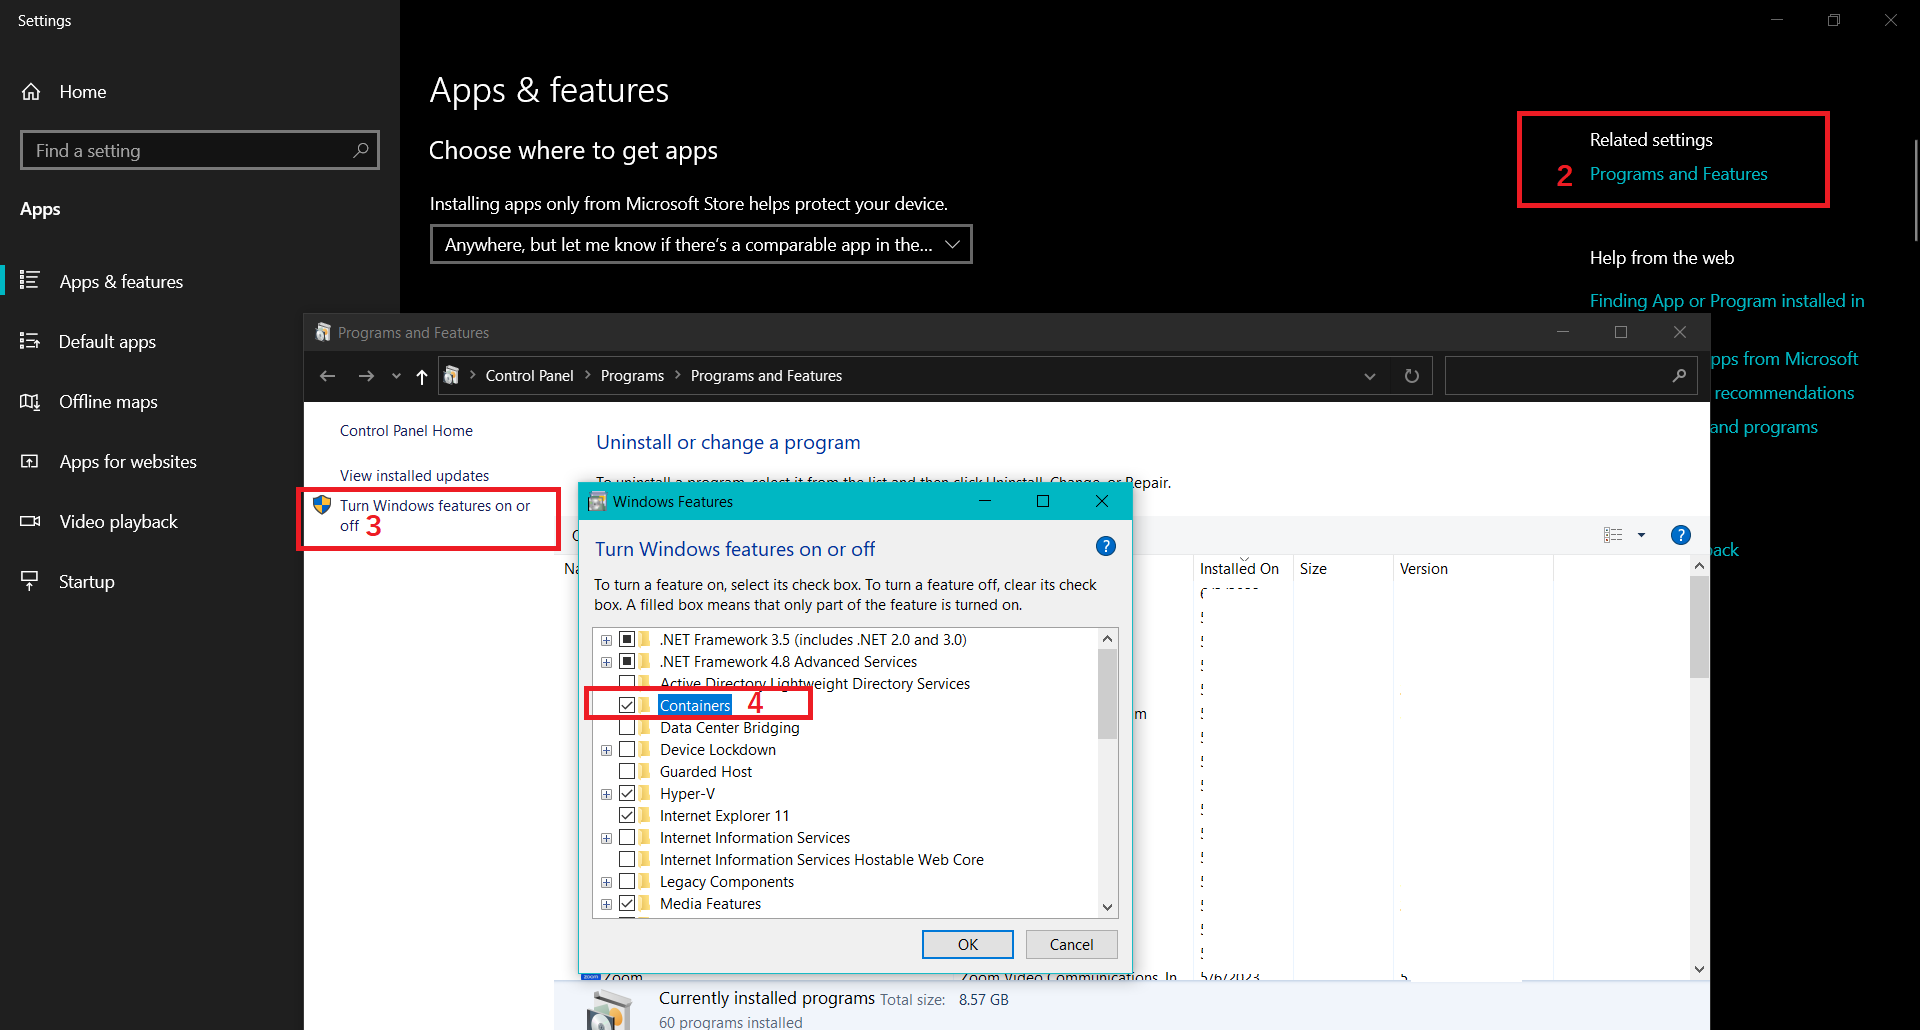

### Install Docker

How To Install Docker on Windows? A Step-by-Step Guide
Lesson 3 of 12By Sana Afreen

Step-By-Step Docker Installation on Windows
1. Go to the website https://docs.docker.com/docker-for-windows/install/ and download the docker file.

Note: A 64-bit processor and 4GB system RAM are the hardware prerequisites required to successfully run Docker on Windows 10.

2. Then, double-click on the Docker Desktop Installer.exe to run the installer.

Note: Suppose the installer (Docker Desktop Installer.exe) is not downloaded; you can get it from Docker Hub and run it whenever required.

3. Once you start the installation process, always enable Hyper-V Windows Feature on the Configuration page.

4. Then, follow the installation process to allow the installer and wait till the process is done.

5. After completion of the installation process, click Close and restart.

ref: https://www.simplilearn.com/tutorials/docker-tutorial/install-docker-on-windows

### Docker Hub Sign Up

https://hub.docker.com/signup?state=hKFo2SBkZDJLclV0M1gyc1hLSHFrekkxekJ5MUdyakpTcDRTU6Fur3VuaXZlcnNhbC1sb2dpbqN0aWTZIHM5WnB4NXJHNWNxMlFNN3NsWWczU2pySVBNNlFWUWVio2NpZNkgRXVEeElRN2cwYzlENzVsdmF0VHV2c1Q1VjVCQWp2d3Y


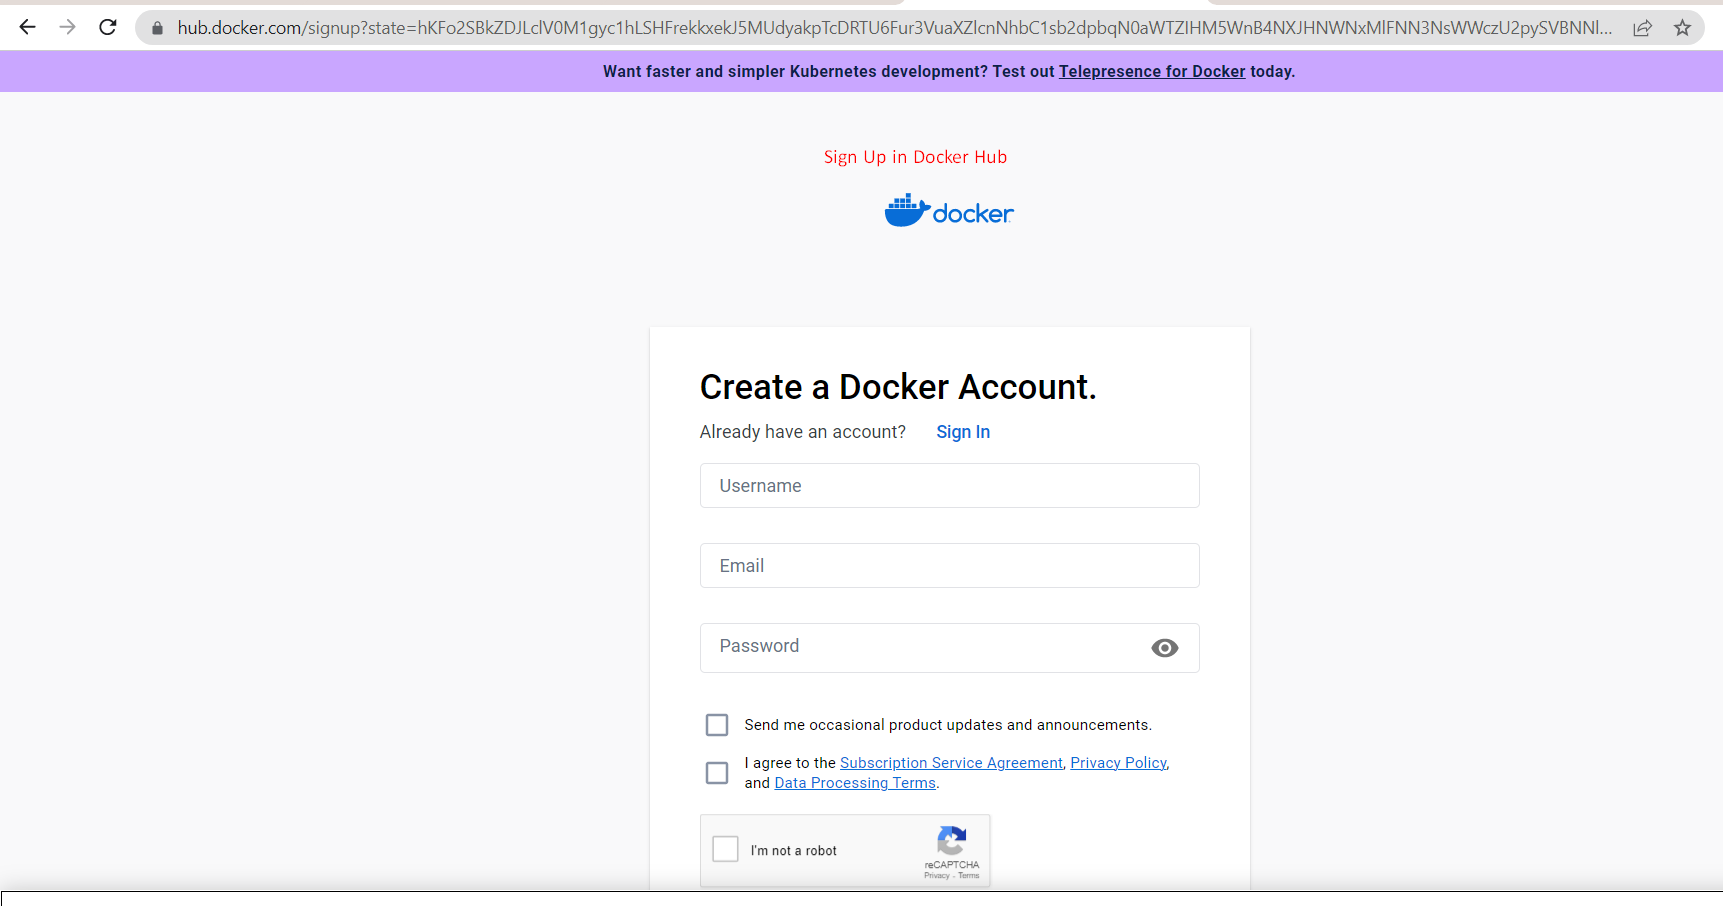

### Apache Airflow

1. go visual studio
2. open project folder
3. user terminal powershell to check docker

`docker --version`

` docker-compose --version `

4. follow the steps of that link to install Airflow: https://levelup.gitconnected.com/how-to-install-apache-airflow-with-docker-7902be3301b8

1. Apache Airflow yaml file download for windows: https://airflow.apache.org/docs/apache-airflow/2.4.1/docker-compose.yaml

as curl commad in powershell is not working for windows, it works for linux

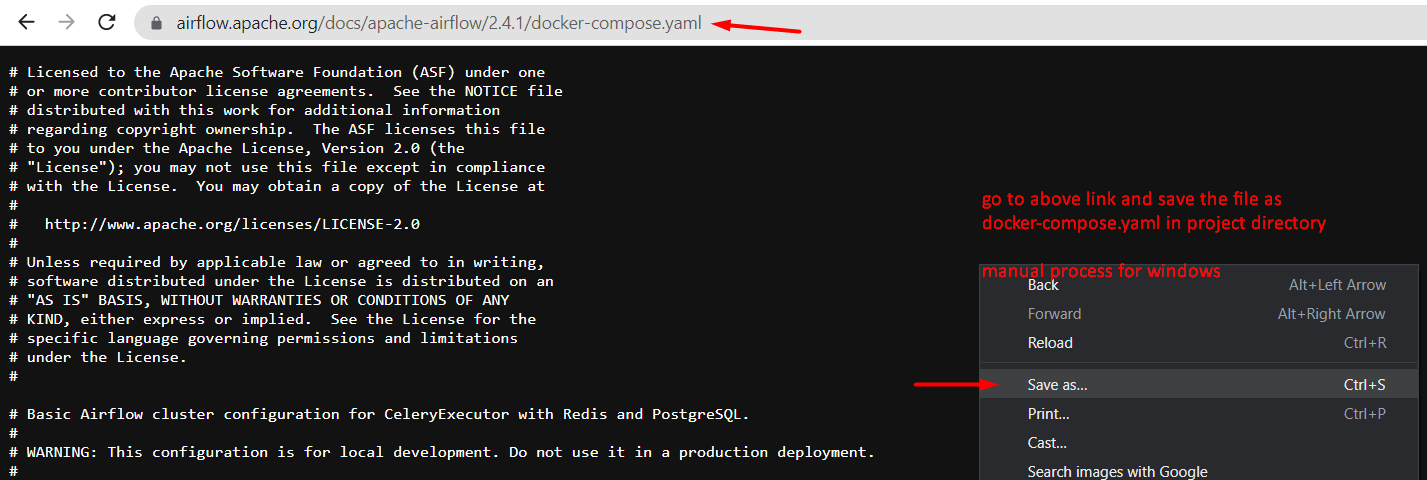

## save yaml file in project directory
name: docker-compase.yaml

make a certain change in script to avoid dummy DAG files

`AIRFLOW__CORE__LOAD_EXAMPLES: 'false'`



### initiate airflow in vscode terminal powershell:

`docker-compose up airflow-init`

### now up the docker-compose in vscode terminal powershell

note: if there is multiple .yaml file, we need to select the specific .yaml

`docker-compose up`

### localhost will appear to access Apache Airflow
http://localhost:8080/home

# create test.py inside dags folder



In [ ]:
'''
#error persists as airflow is not running locally rather running inside docker container
#therefore no issue
# import datetime
from datetime import datetime

# import DAG
from airflow import DAG

# for python operator
from airflow.operators.python_operator import PythonOperator

#for task one
def print_hw():
    print('Hello World')
#for task two
def print_gb():
    print("Good Bye all")

#create DAG and Scheduler

test_dag = DAG(
    "test_dag",
    schedule_interval = None, #no auto run based on interval
    start_date =  datetime(2023, 6, 6)

)

#define task
TASK_ONE = "task_one_id" #any name
TASK_TWO = "task_two_id" #any name

#define task using DAG
with  test_dag:
    first_task = PythonOperator(
        task_id = TASK_ONE,
        python_callable = print_hw, #1st function  name
    )
    second_task = PythonOperator(
        task_id = TASK_TWO,
        python_callable = print_gb,
    )
    # task chronology
    first_task >> second_task

    '''

### Go to localhost of Apache Airflow

DAGs >> Action >> run
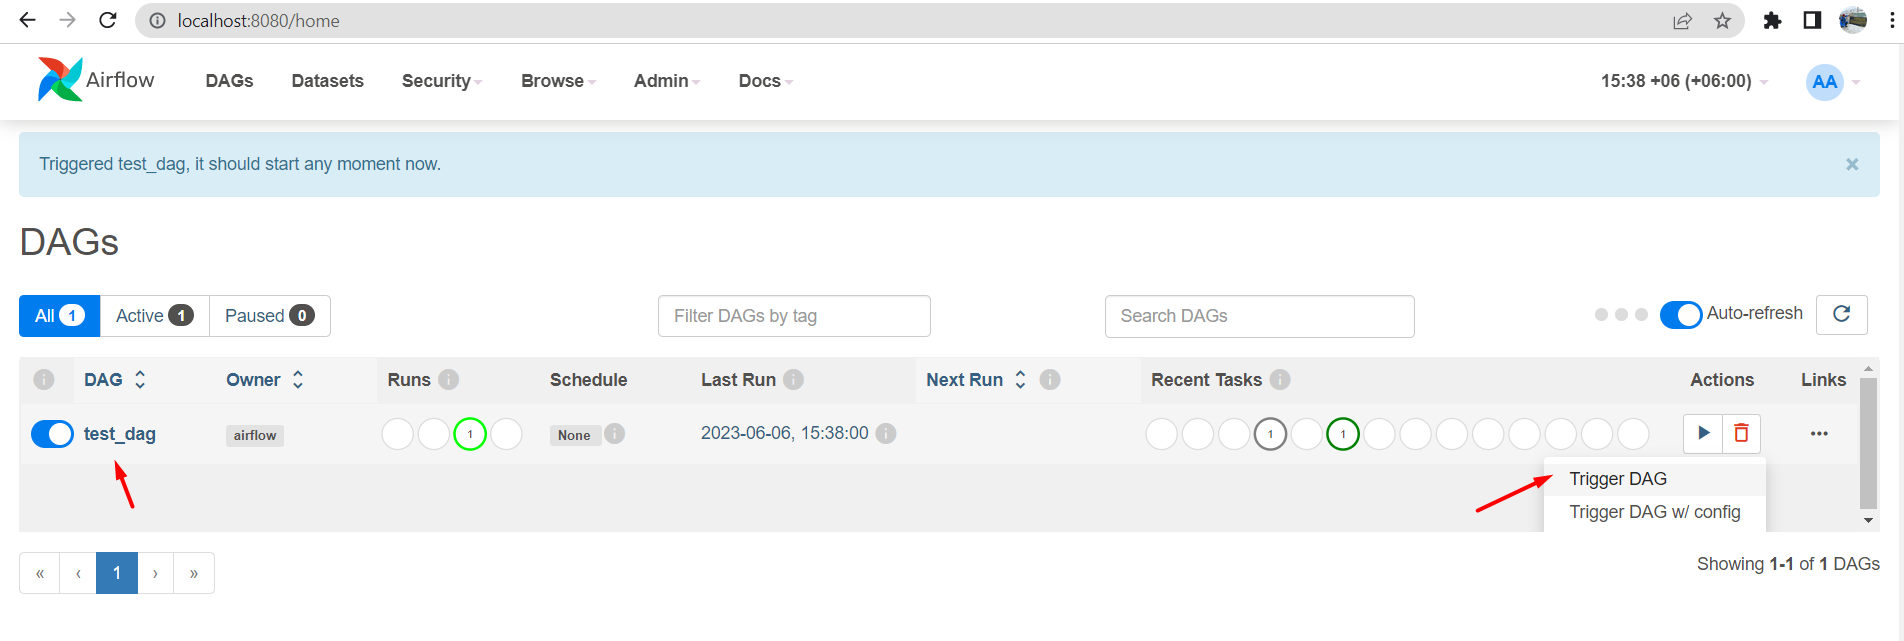

### Output log
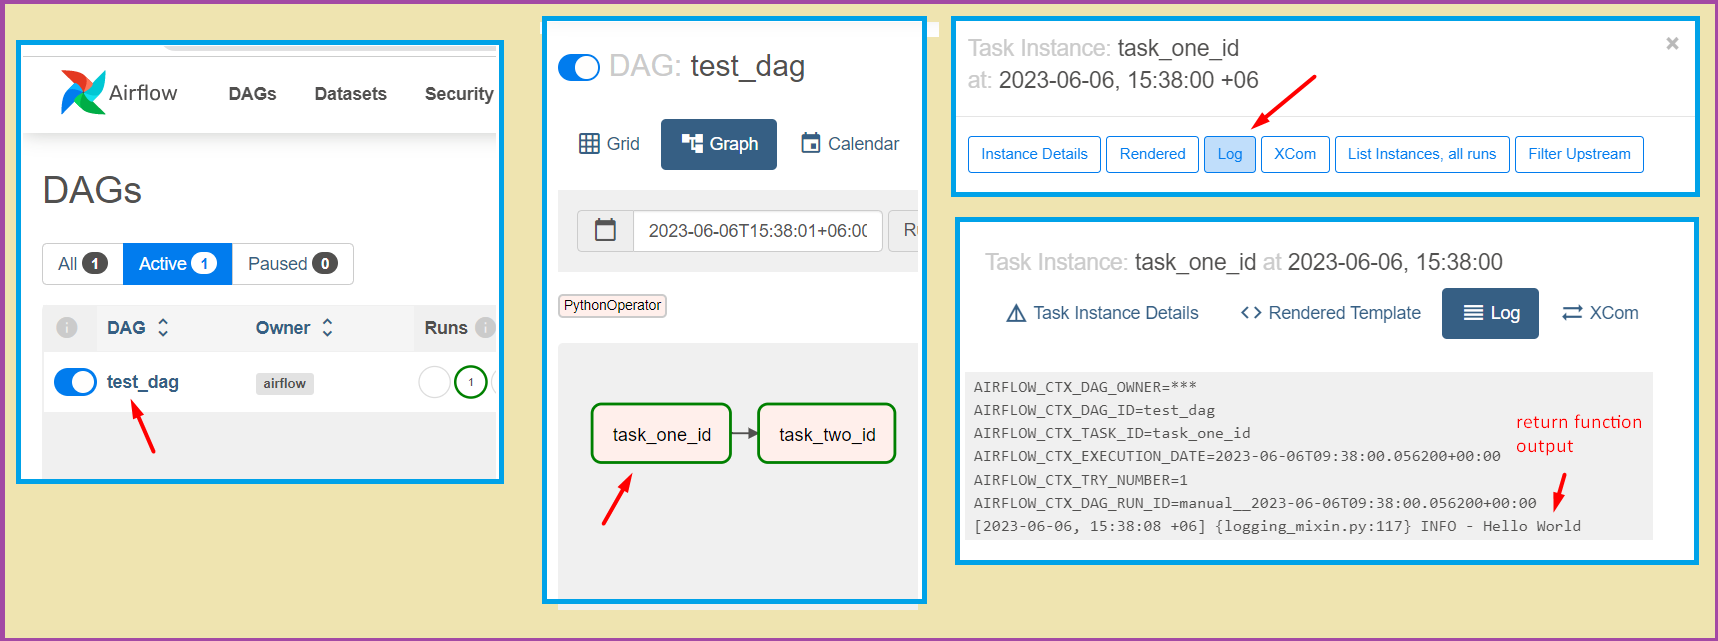

### To apply scheduler on .py file inside dags directory

go to following website: crontab guru for date and time formatting; apply cron job
https://crontab.guru/

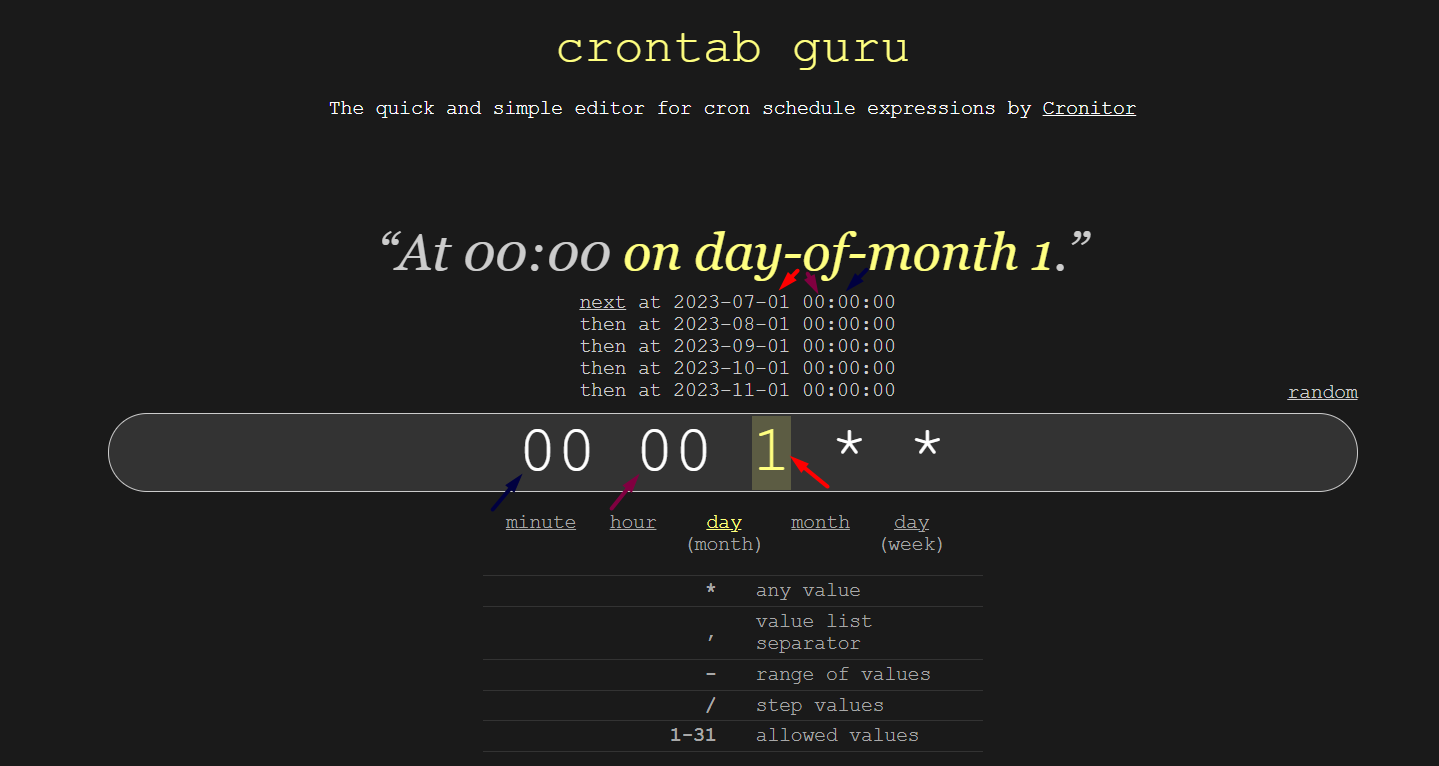

### Create .py for data preprocessing and model creation under dags folder

**project: airline_prediction.py**

### Edit docker-compose.yaml to show newly added "data" directory

` - ./data:/opt/airflow/data #add data directory by me--for project`


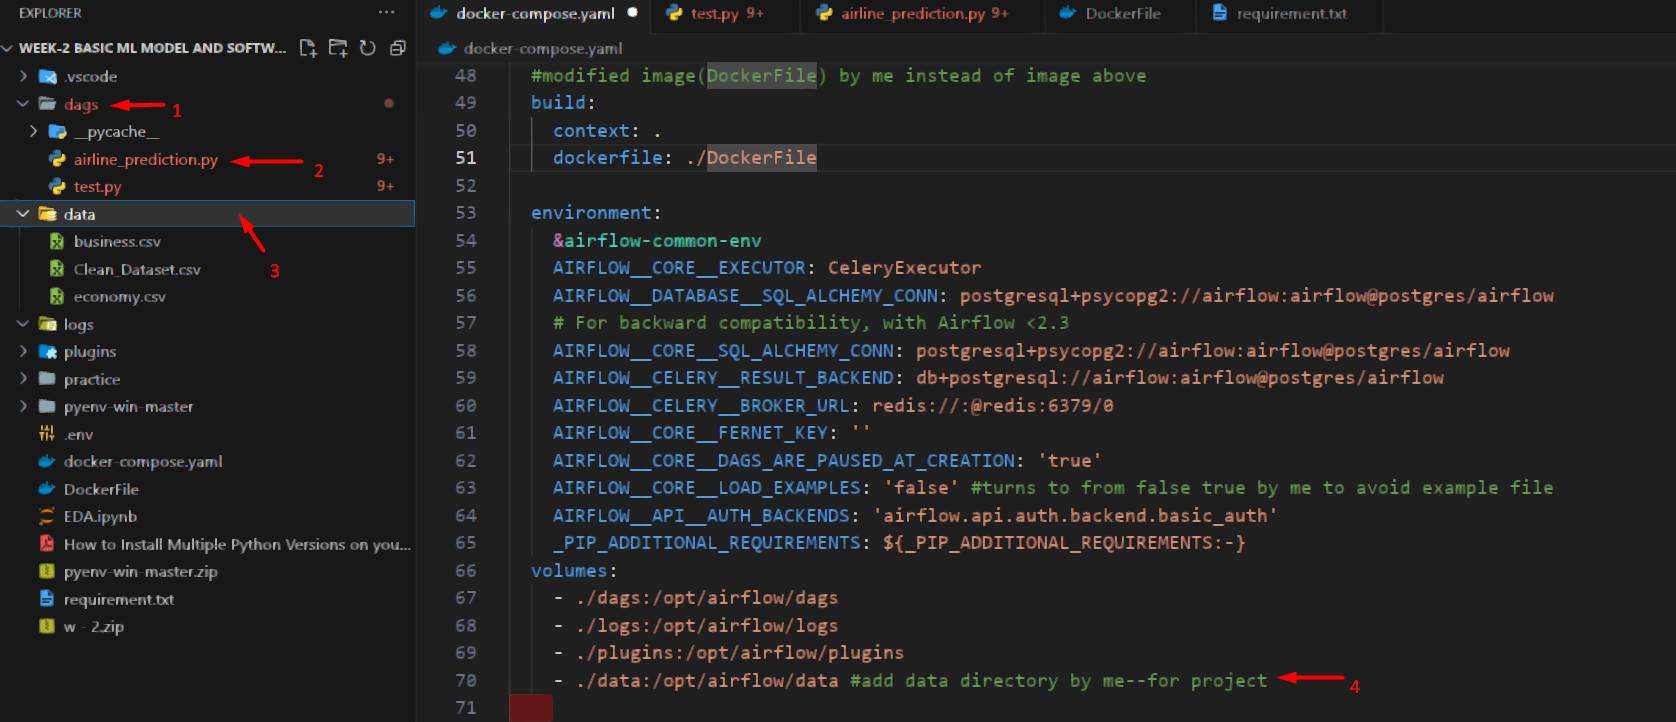

### Error Generates in Airflow and Resolved

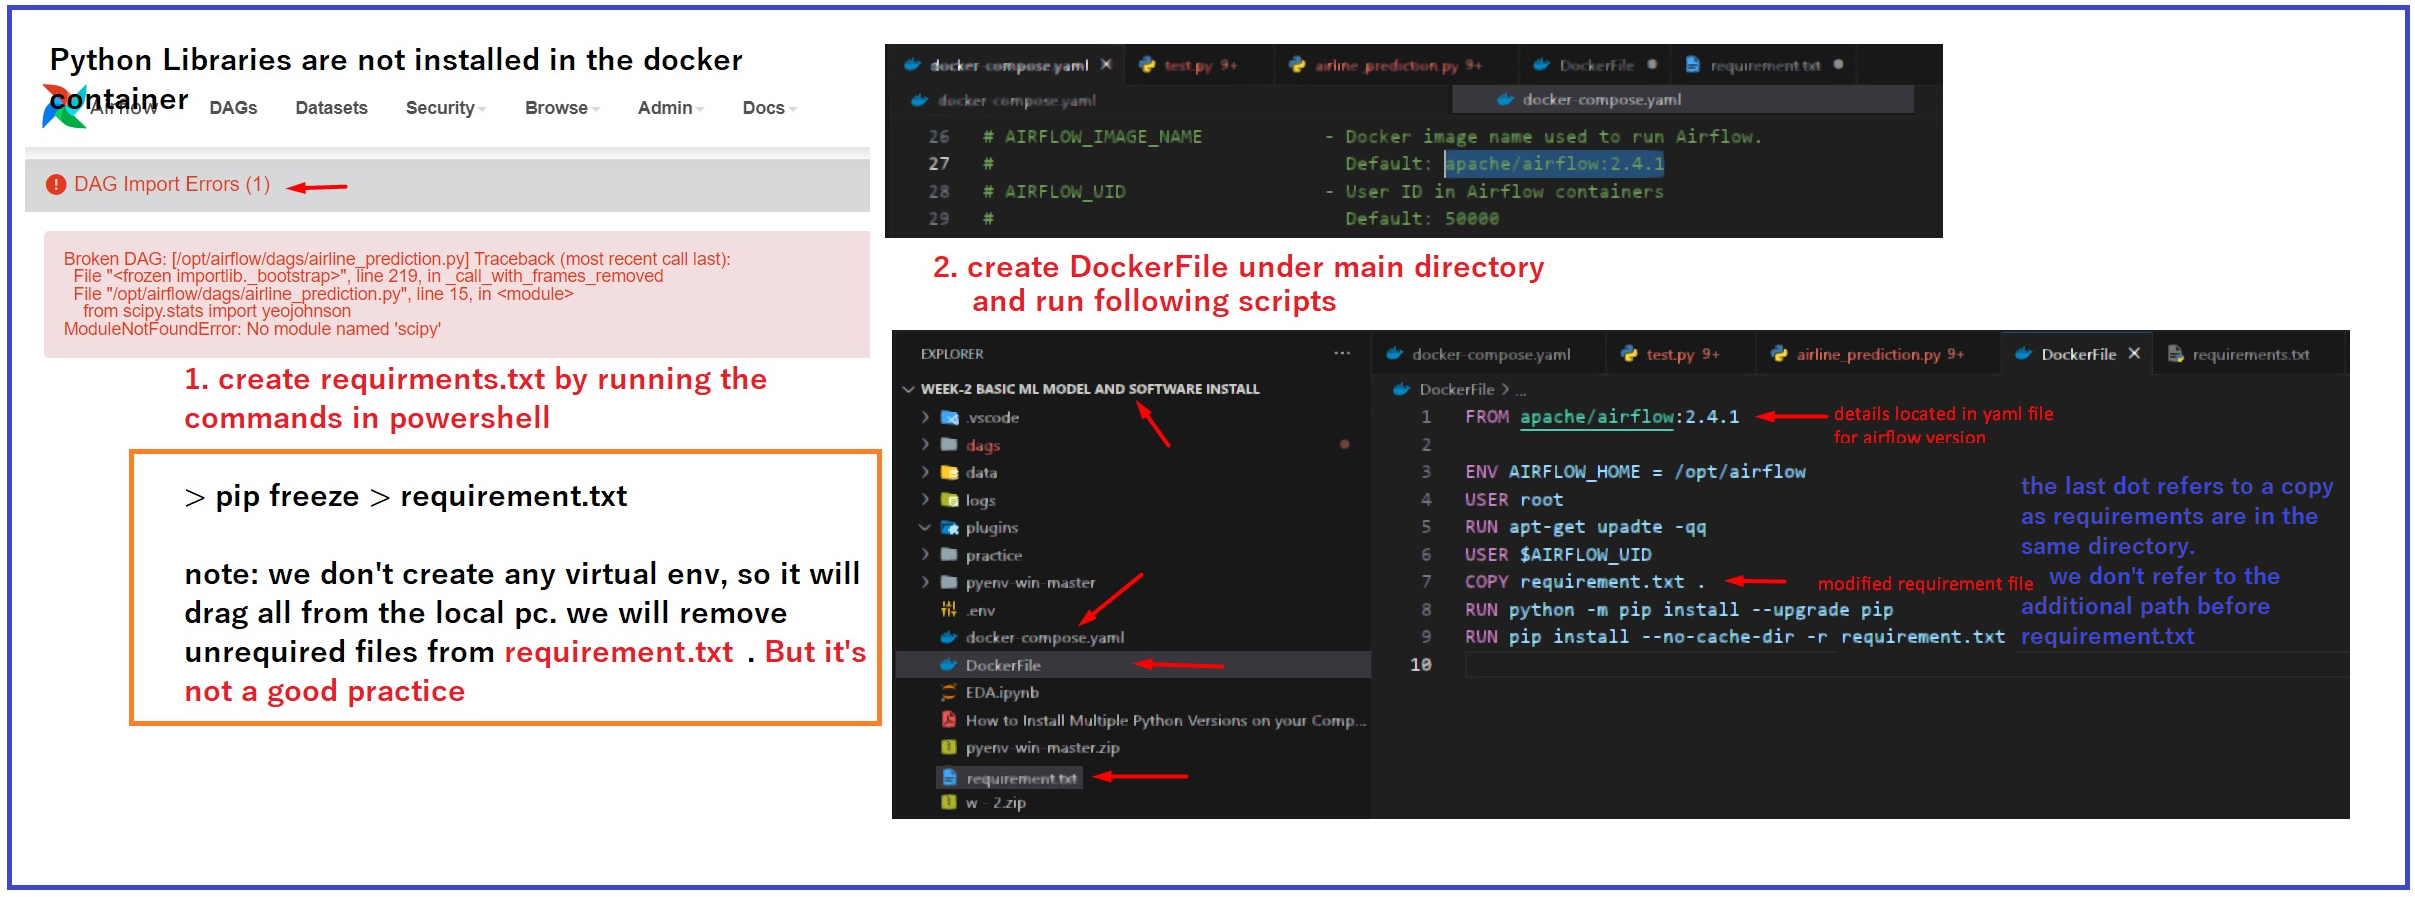

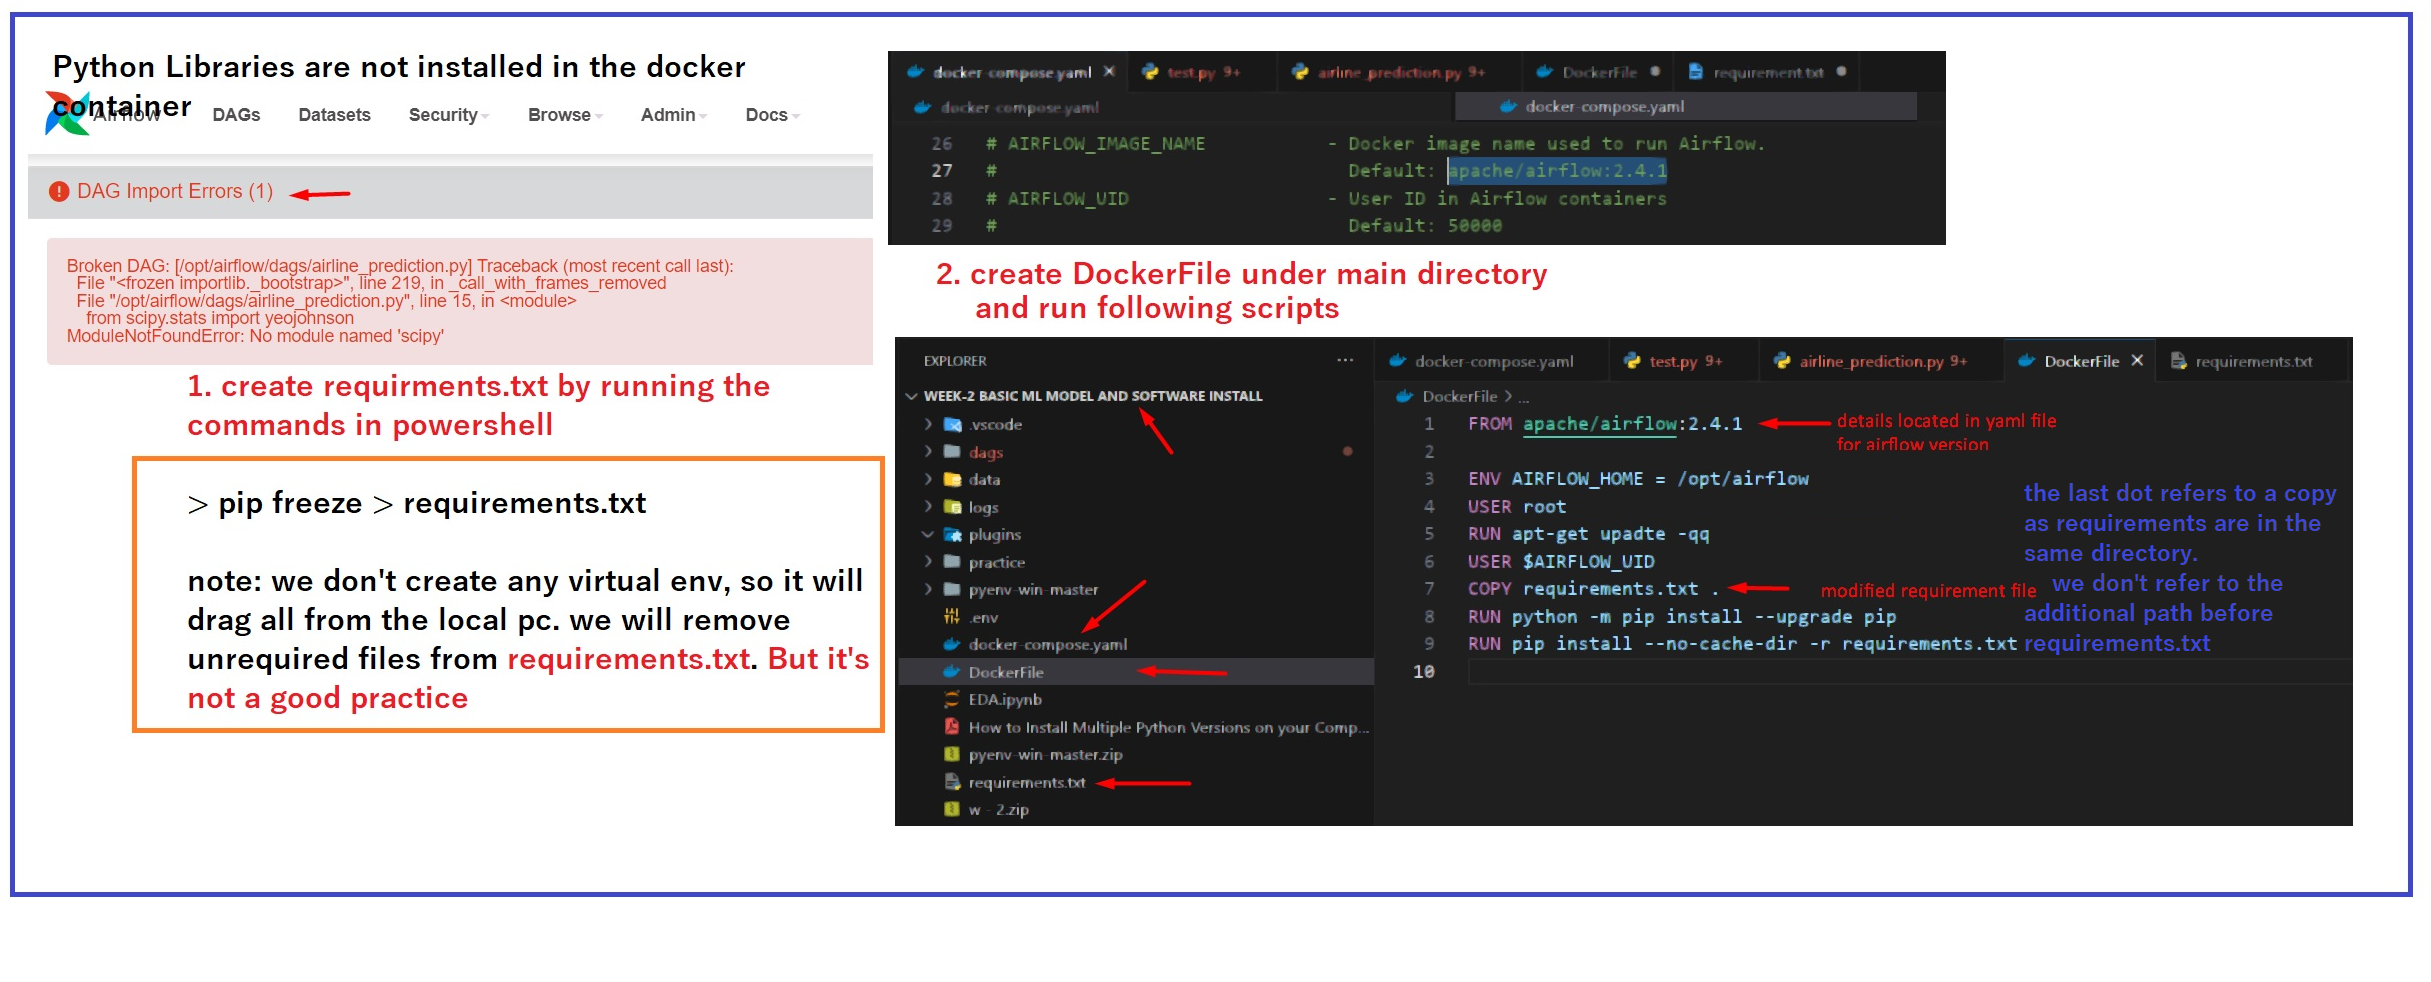

## run commands on powershell terminal vscode for requirements.txt
`>pip freeze > requirement.txt`

it will drag all the requirements from local pc. as we don't create any virtual environment.

remove unrequired file details from **requirements.txt** manualy. but it's not a good practice.

### Go to DockerFile(create under the main directory)

note: DockerFile doesn't have any extension

run the following python script. Airflow version can be collected from docker-compose.yaml file



In [ ]:
'''
FROM apache/airflow:2.4.1

ENV AIRFLOW_HOME = /opt/airflow
USER root
RUN apt-get update -qq
USER $AIRFLOW_UID
COPY requirements.txt . #last dot refers same directory. if requirements.txt is in other dir, we need to refer that dir
RUN python -m pip install --upgrade pip
RUN pip install --no-cache-dir -r requirements.txt

'''

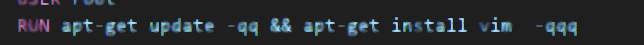

we can use `apt-get install vim  -qqq` for virtual (vim). here we can remove it

### Works on docker-compose.yaml file(to create new image file for Airflow [DockerFile])

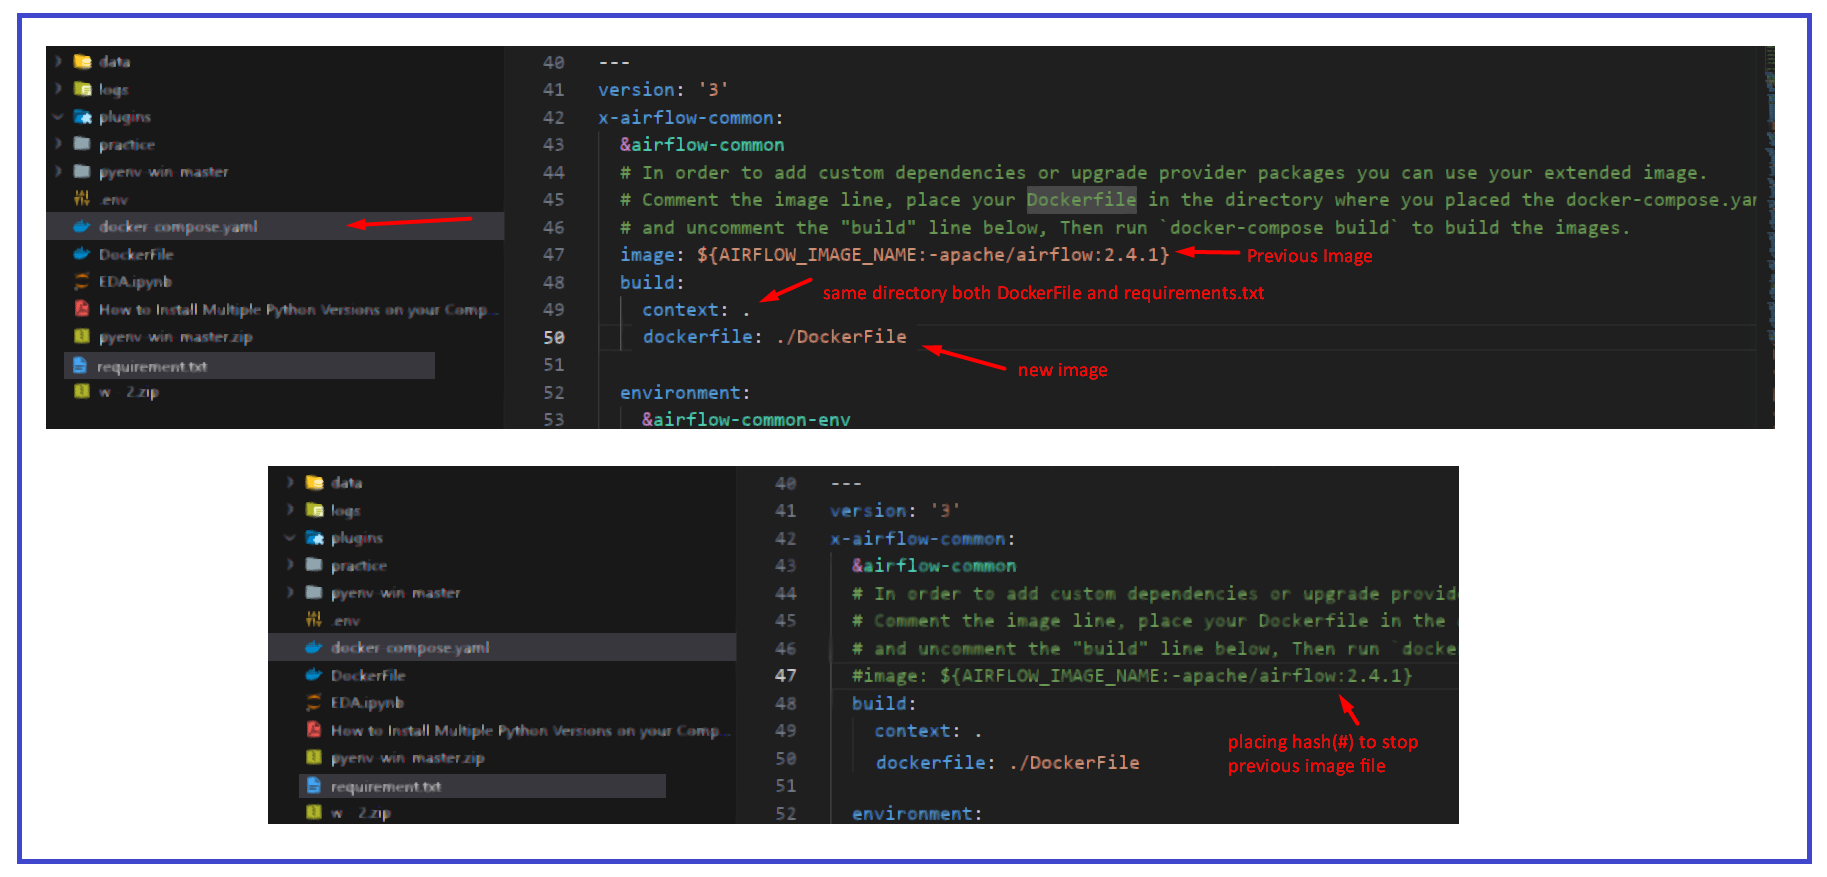

### remove details from Docker Desktop and project(vscode) logs dir

Remove previous container, volumn for this project from Docker Desktop as well as log details from logs directory in vscode project if log details aren't required before initiate the following command in powershell.

`docker-compose up airflow-init`

### Python Libaries Requirement and Version mismatch solving process

`docker-compose up airflow-init`

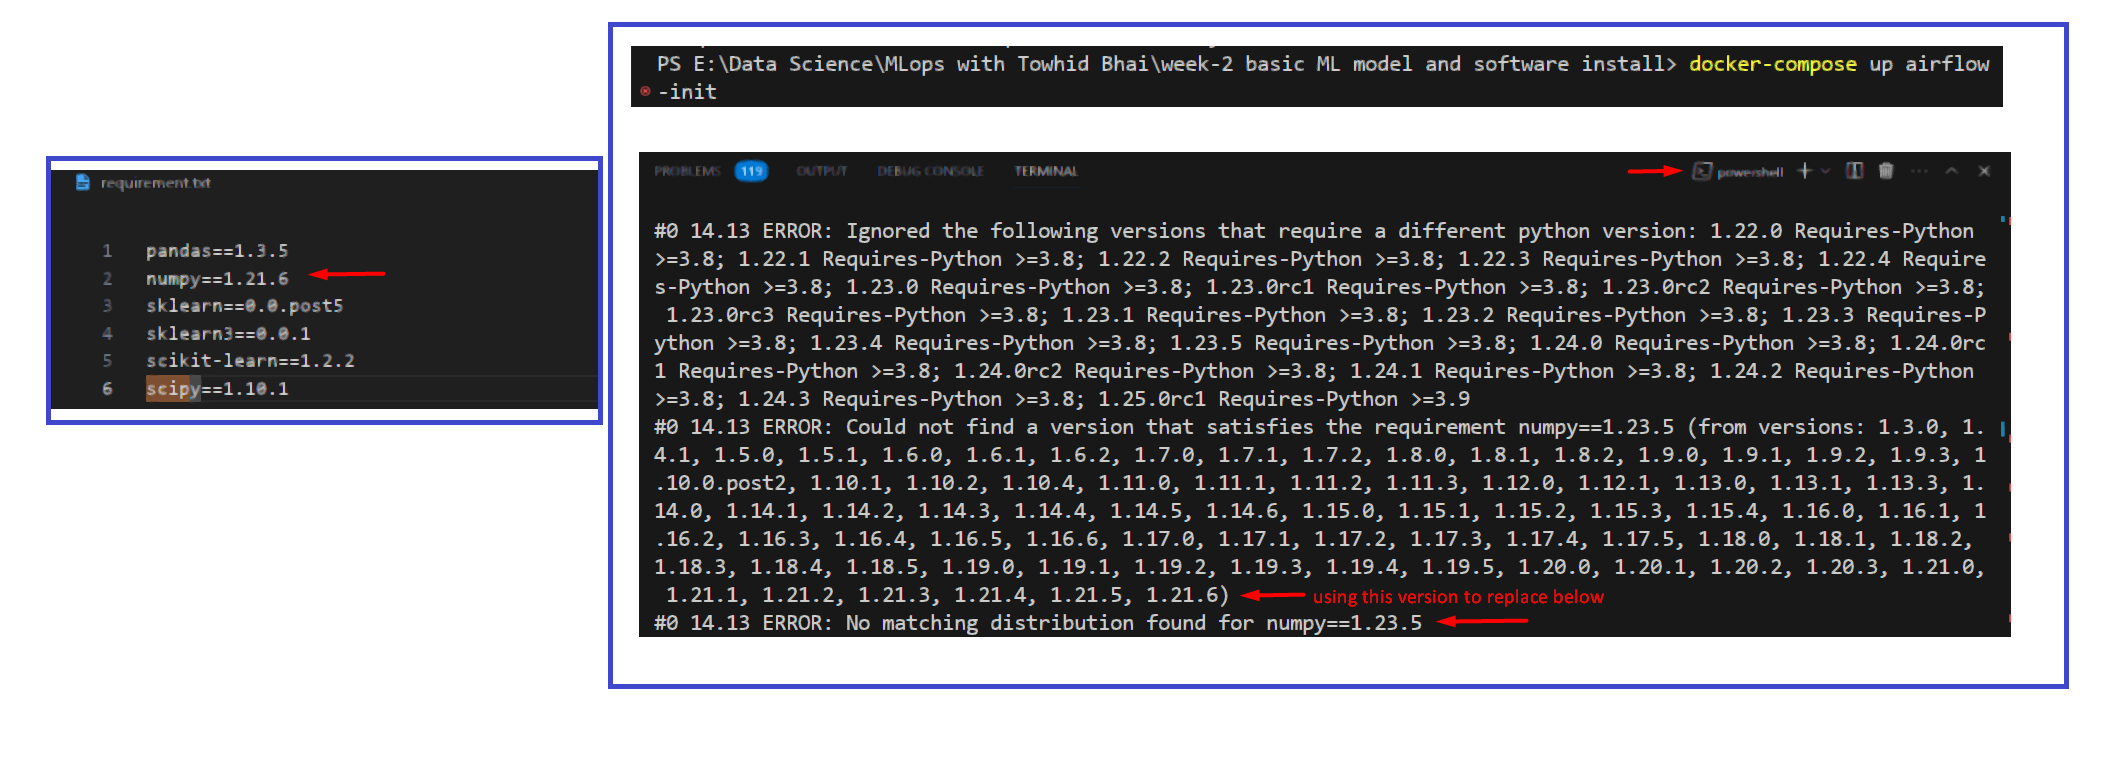

### final outcome after error solving and python version mismatch

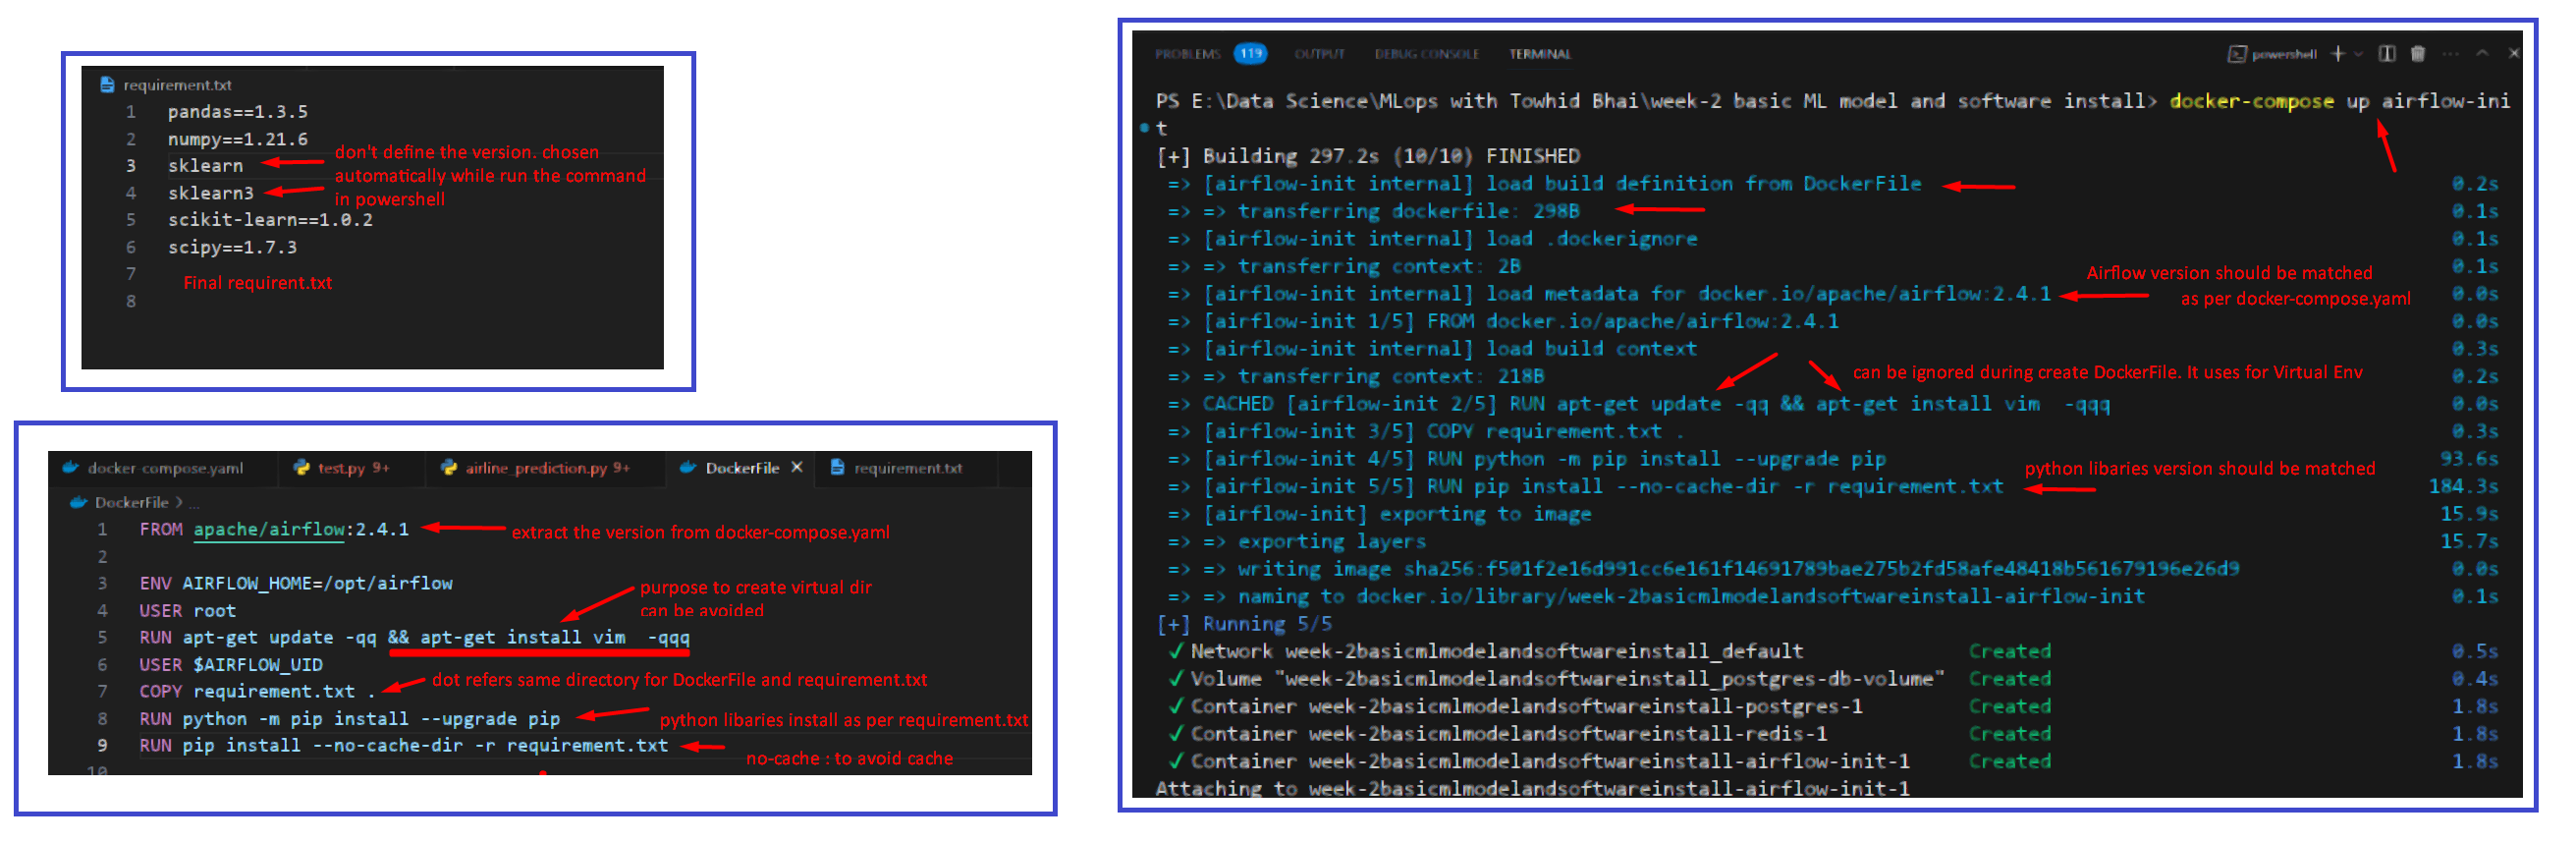

### Run and up the docker-compose in powershell terminal of vscode
`docker-compose up`

sometimes error occurs due to space and usage limitation of RAM and CPU. and after successful running, we will get localhost url: http://localhost:8080/
to access **Apache Airflow**.
default user and password

user: airflow
pass: airflow




### Run Corressponding DAC

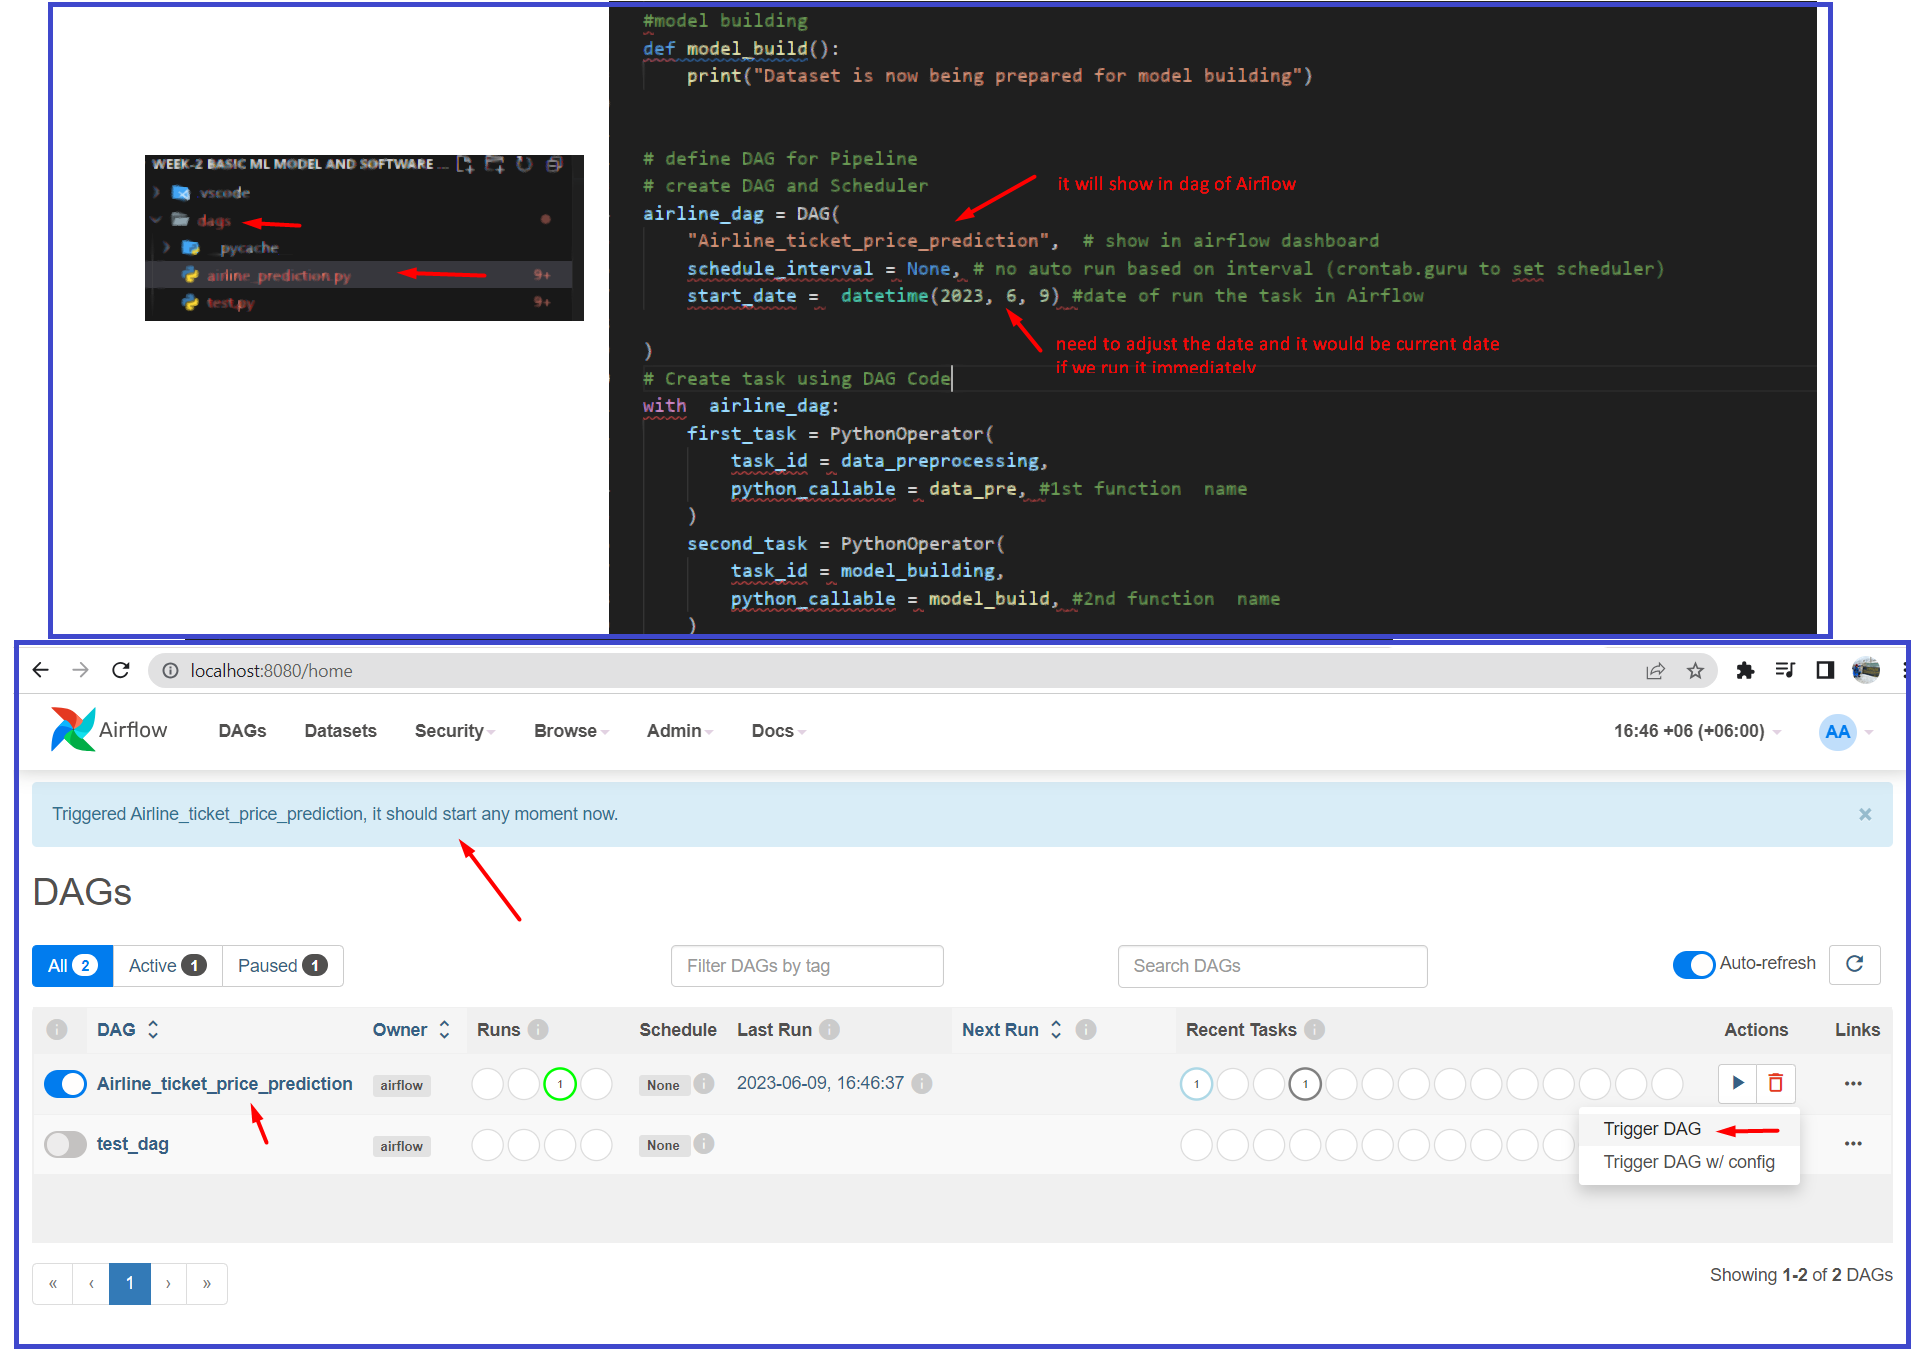

### Successful Status

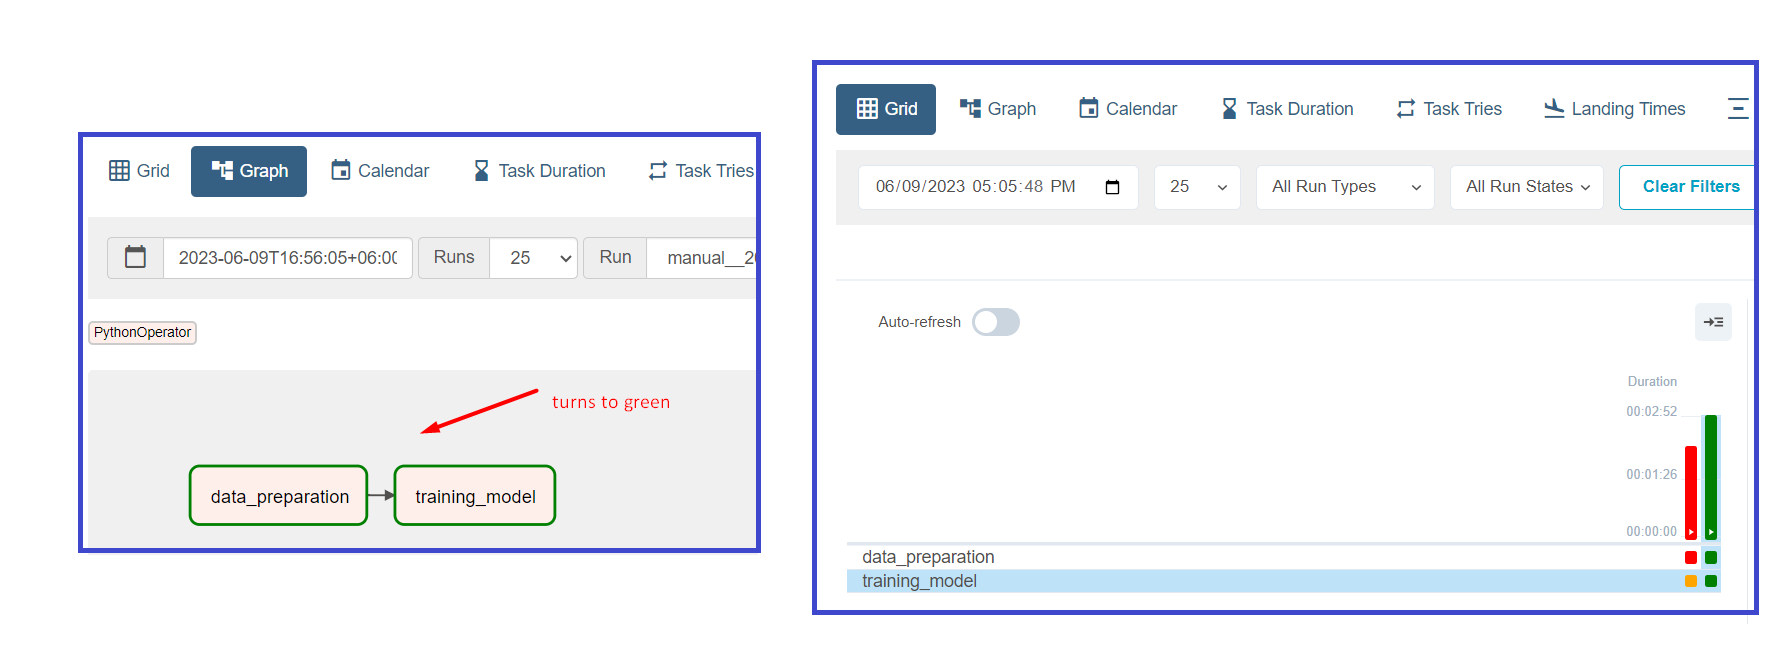

### Access Docker Worker Container and bash command in powershell

Go to powershell terminal to access Docker Container

>> `pyenv shell 3.8.6`

>> `docker ps`

from docker container list find docker worker id and run bash command to access docker worker conatiner

>>`docker exec -it 99a3f3bdcfc2 bash`

use ls to see the list of file in docker worker container

airflow@99a3f3bdcfc2:/opt/airflow$ `ls`

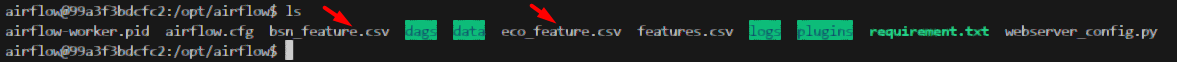

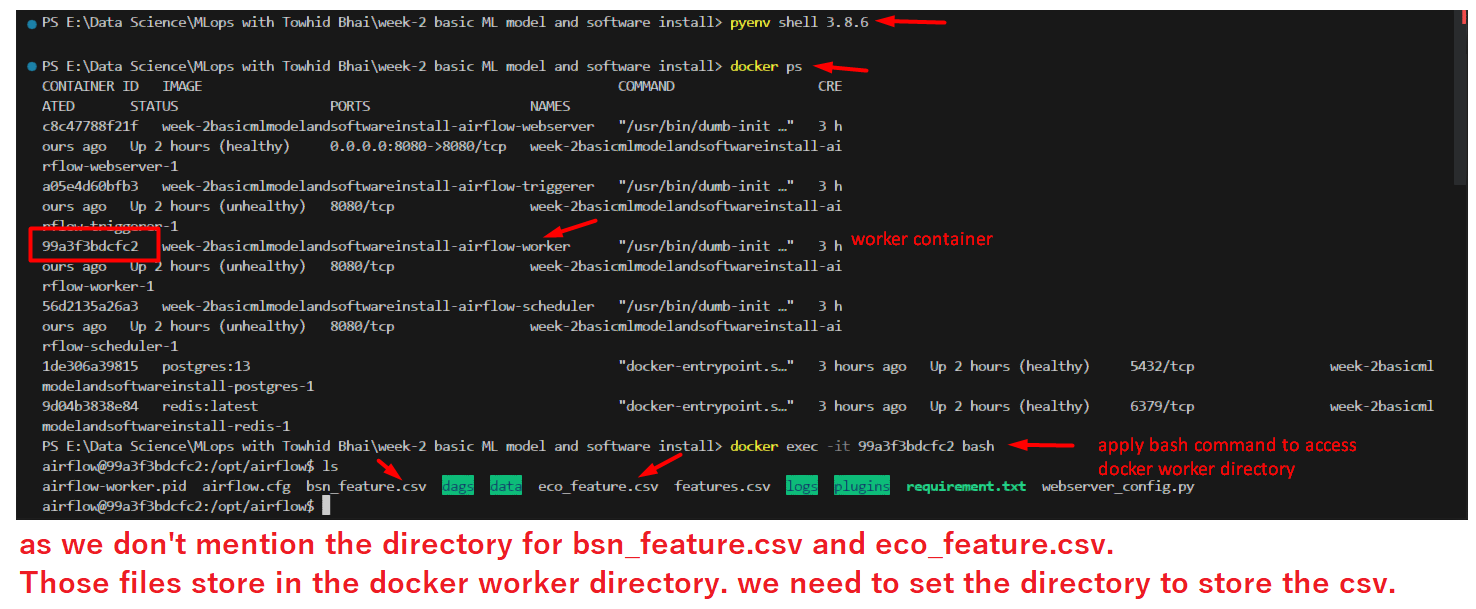

**note:** as we don't mention the directory for **bsn_feature.csv** and **eco_feature.csv**.
Those files store in the docker worker directory. we need to set the directory
to store the csv.   



### Result after changing path

1. **previously and why store in docker worker container**

df.iloc[class_eco].to_csv('eco_feature.csv', index = False)

df.iloc[class_bsn].to_csv('bsn_feature.csv', index = False)

2. **new directory to store data in local dir**

df.iloc[class_eco].to_csv(`'/opt/airflow/data/eco_feature.csv'`, index = False)

df.iloc[class_bsn].to_csv(`'/opt/airflow/data/bsn_feature.csv'`, index = False)

**run the DAG on airflow local host**


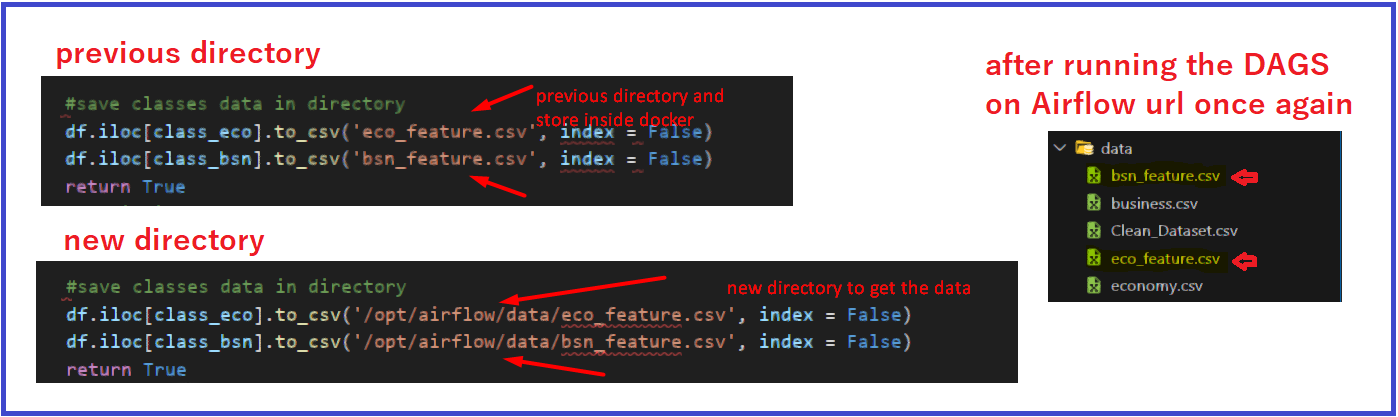

### Use of XCOMs to push and pull the data

there are mutlitple operators (python operator, bash operator) have been involved in DAG. We use XCOMs(Cross communication) to establish the communication.

`ti`: task instance


In [ ]:
'''
def data_pre(ti, path = "/opt/airflow/data/Clean_Dataset.csv"):
	#ti = task instance
	# push the data to XCom. Then next task/stage will pull the data from XCom
	feature_dict = {"economy" : '/opt/airflow/data/eco_feature.csv',
                    "business" : '/opt/airflow/data/bsn_feature.csv'}
	#Data pushing to xcom
	ti.xcom_push(key = "feature_dir", value = feature_dict)

#to pull the data from XCOM

def model_build_economy(ti):

    # pulling the data from xcom(variable name can be anything for pulling, here "dir")
    	dir_dict = ti.xcom_pull(key = "feature_dir")

    	filename = dir_dict['economy']

'''